In [1]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Barbie/barbie-chart_data-volume-days-pageTypes.csv")

In [3]:
df = df.drop(df.index[0])

In [4]:
df

,days,07/21/2023,07/22/2023,07/23/2023,07/24/2023,07/25/2023,07/26/2023,07/27/2023,07/28/2023,07/29/2023,...,01/12/2024,01/13/2024,01/14/2024,01/15/2024,01/16/2024,01/17/2024,01/18/2024,01/19/2024,01/20/2024,01/21/2024
1,QQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,YouTube,98,108,96,99,114,93,93,64,87,...,7,7,5,7,4,21,16,10,1,12
3,Broadcast,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Facebook,0,0,0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Legacy Instagram,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Tumblr,4349,6020,6746,6423,8398,6104,6889,5581,4482,...,229,159,394,295,232,181,147,177,256,337
7,Instagram,1,0,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,1
8,LinkedIn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blogs,235,114,150,211,169,142,111,102,69,...,29,25,18,35,23,20,27,26,10,16
10,Forums,320,452,592,399,259,229,180,186,143,...,20,16,19,36,22,18,28,22,12,24


In [5]:
engagement = df.copy()

In [6]:
#Transpose Matrix
engagement = engagement.transpose()

In [7]:
#Creating df for Regression Analysis
reg_engagement = df.transpose().copy()

In [8]:
#Calculate Sum of engagements from each source
row_sums = engagement.sum(axis=1)

# Add row sums as a new column
engagement['total'] = row_sums
#engagement['total'] = engagement.iloc[:,6] #Only Forums

#Drop first Row containing all sources
engagement = engagement.drop(engagement.index[0])

#Drop all columns except the 'total' column
columns_to_keep = [engagement.columns[-1]]
engagement = engagement[columns_to_keep]

engagement.index.name = 'date'
engagement.index = pd.to_datetime(engagement.index)

In [9]:
engagement

,total
date,
2023-07-21,20594
2023-07-22,33002
2023-07-23,25241
2023-07-24,16202
2023-07-25,14943
...,...
2024-01-17,556
2024-01-18,1119
2024-01-19,541


In [10]:
bo = pd.read_csv("/Users/jatinartwani/Documents/Personal/CMU/MISM/Sem2/Measuring Social/Barbie/barbie-bo.csv")

In [11]:
bo = bo.dropna(axis=1)

In [12]:
bo

,date,revenue,to_date
0,07/21/2023,"$70,503,178","$70,503,178"
1,07/22/2023,"$47,812,356","$118,315,534"
2,07/23/2023,"$43,706,510","$162,022,044"
3,07/24/2023,"$26,105,167","$188,127,211"
4,07/25/2023,"$26,003,569","$214,130,780"
...,...,...,...
180,01/17/2024,$36,"$636,236,256"
181,01/18/2024,$145,"$636,236,401"
182,01/19/2024,$791,"$636,237,192"
183,01/20/2024,$574,"$636,237,766"


In [13]:
#Fixing 'date' column
#bo['date'] = pd.to_datetime(bo['date'] + '-2021', format='%b-%d-%Y')

#bo['date'] = bo['date'].dt.strftime('%m/%d/%Y')

# Making 'date' the index of the DataFrame
bo.set_index('date', inplace=True)

#Remove $ value
bo['revenue'] = bo['revenue'].str.replace('$', '')
bo['revenue'] = bo['revenue'].str.replace(',', '')

In [14]:
bo

,revenue,to_date
date,,
07/21/2023,70503178,"$70,503,178"
07/22/2023,47812356,"$118,315,534"
07/23/2023,43706510,"$162,022,044"
07/24/2023,26105167,"$188,127,211"
07/25/2023,26003569,"$214,130,780"
...,...,...
01/17/2024,36,"$636,236,256"
01/18/2024,145,"$636,236,401"
01/19/2024,791,"$636,237,192"


In [15]:
engagement['total'] = pd.to_numeric(engagement['total'], errors='coerce')
bo['revenue'] = pd.to_numeric(bo['revenue'], errors='coerce')

In [16]:
engagement_ts = engagement.copy()
bo_ts = bo.copy()

In [17]:
engagement_ts

,total
date,
2023-07-21,20594
2023-07-22,33002
2023-07-23,25241
2023-07-24,16202
2023-07-25,14943
...,...
2024-01-17,556
2024-01-18,1119
2024-01-19,541


In [18]:
bo_ts.head(45)

,revenue,to_date
date,,
07/21/2023,70503178,"$70,503,178"
07/22/2023,47812356,"$118,315,534"
07/23/2023,43706510,"$162,022,044"
07/24/2023,26105167,"$188,127,211"
07/25/2023,26003569,"$214,130,780"
07/26/2023,23034051,"$237,164,831"
07/27/2023,21238020,"$258,402,851"
07/28/2023,29032661,"$287,435,512"
07/29/2023,34586429,"$322,021,941"


In [19]:
# Combine your datasets into a single DataFrame 
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

In [20]:
combined_df.head(66)

,total,revenue
date,,
2023-07-21,20594,70503178
2023-07-22,33002,47812356
2023-07-23,25241,43706510
2023-07-24,16202,26105167
2023-07-25,14943,26003569
...,...,...
2023-09-20,702,285863
2023-09-21,654,316431
2023-09-22,800,786647


In [21]:
#Making Data Stationary

#Differencing
#engagement_ts['total'] = engagement_ts['total'].diff()
#bo_ts['revenue'] = bo_ts['revenue'].diff()


#Taking Logarithm
#engagement_ts['total'] = np.log(engagement_ts['total'])
#bo_ts['revenue'] = bo_ts['revenue'].replace(-np.inf, np.nan)

# Dropping NA values after making it stationary
#engagement_ts.dropna(inplace=True)
#bo_ts.dropna(inplace=True)

In [22]:
#Checking Stationarity
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Example usage
check_stationarity(engagement_ts['total'])
check_stationarity(bo_ts['revenue'])

ADF Statistic: -6.585166
p-value: 0.000000
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575
ADF Statistic: -6.321603
p-value: 0.000000
Critical Values:
	1%: -3.469
	5%: -2.879
	10%: -2.576


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


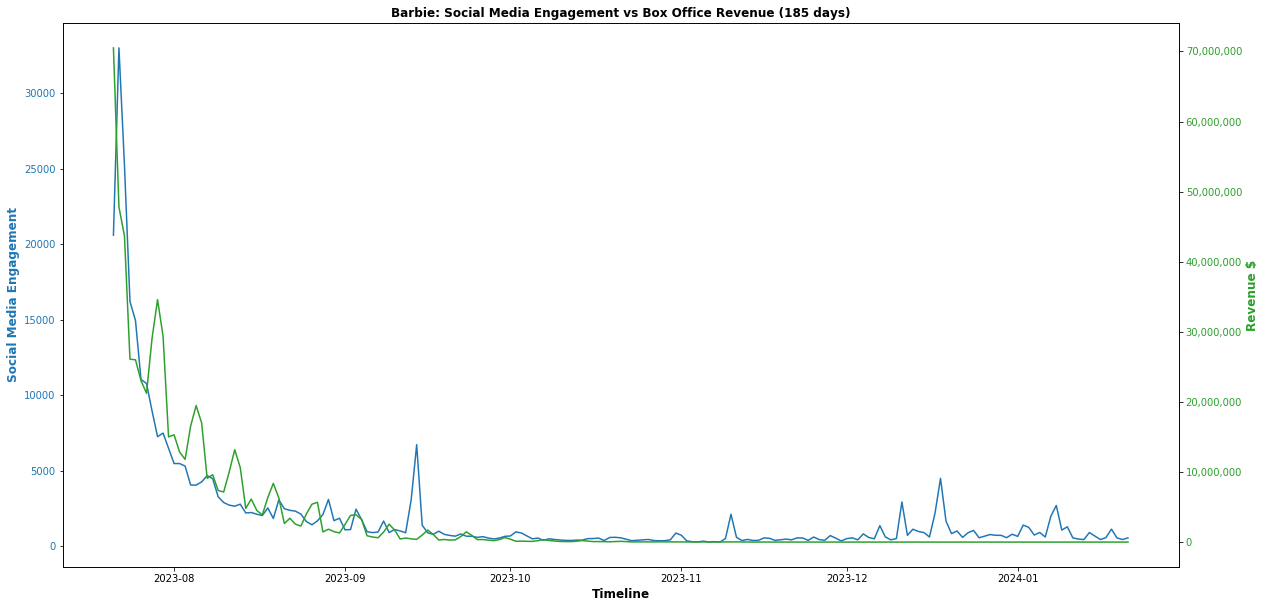

In [23]:
fig, ax1 = plt.subplots(figsize=(20,10))

color = 'tab:blue'
ax1.set_xlabel('Timeline',fontsize=12,fontweight='bold')
ax1.set_ylabel('Social Media Engagement',color=color,fontsize=12,fontweight='bold')
ax1.plot(combined_df.index,combined_df['total'],color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Revenue $',color=color,fontsize=12,fontweight='bold')
ax2.plot(combined_df.index, combined_df['revenue'],color=color)
ax2.tick_params(axis='y',labelcolor=color)

y_labels = ['{:,.0f}'.format(y) for y in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_labels)
plt.title('Barbie: Social Media Engagement vs Box Office Revenue (185 days)',fontsize=12,fontweight='bold')

plt.grid(False)
plt.show()

In [24]:
correlation, _ = pearsonr(combined_df['total'], combined_df['revenue'])

In [25]:
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: 0.8919498305474434


Maximum Pearson correlation coefficient: 0.9424781617922463
Lag associated with Maximum Pearson correlation coefficient: 2


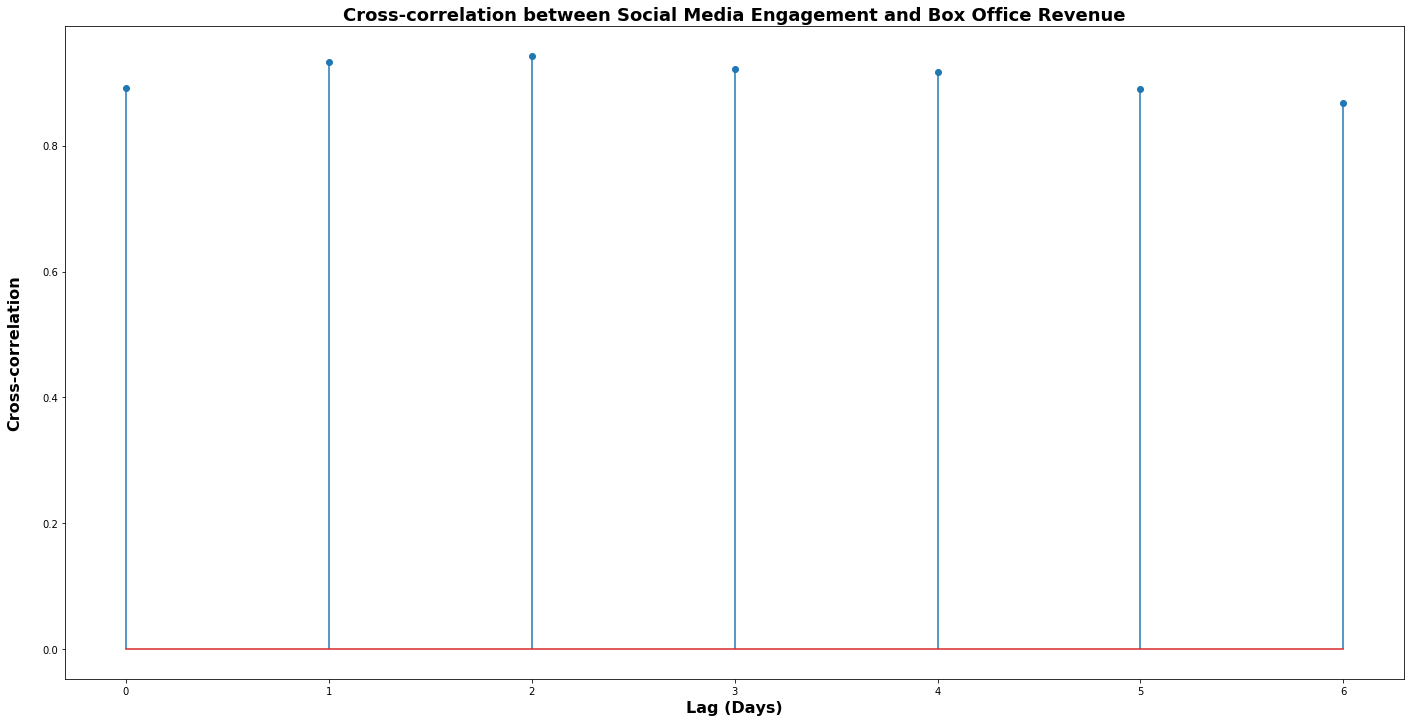

In [26]:
def cross_correlation(series1, series2, lag=0):
    return series1.corr(series2.shift(lag))

# Example usage:
lags = range(0, 7)  # Example lag values from 0 to 12
cross_corr_values = {}
for lag in lags:
    cross_corr_values[lag] = cross_correlation(combined_df['total'], combined_df['revenue'], lag)


max_pair = max(cross_corr_values.items(), key=lambda x: x[1])

#print(cross_corr_values.values())
#cross_corr_values = [cross_correlation(combined_df['total'], combined_df['revenue'], lag) for lag in lags]

print(f'Maximum Pearson correlation coefficient: {max_pair[1]}')
print(f'Lag associated with Maximum Pearson correlation coefficient: {max_pair[0]}')
# Plotting the cross-correlation values
import matplotlib
#matplotlib.use('TkAgg')  # Use TkAgg backend
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 12))
plt.stem(lags, cross_corr_values.values(), use_line_collection=True)
plt.xlabel('Lag (Days)',fontsize=16,fontweight='bold')
plt.ylabel('Cross-correlation',fontsize=16,fontweight='bold',labelpad=20)
plt.title('Cross-correlation between Social Media Engagement and Box Office Revenue',fontsize=18,fontweight='bold')
plt.show()

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Combine your datasets into a single DataFrame for the Granger causality test
combined_df = pd.concat([engagement_ts['total'], bo_ts['revenue']], axis=1)
combined_df.columns = ['total', 'revenue']

# Perform the Granger causality test
# The maxlag parameter is the maximum lag to test for, and the test 'ssr_chi2test' is one of the possible tests
granger_test_results = grangercausalitytests(combined_df, maxlag=10, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=79.2818 , p=0.0000  , df_denom=181, df_num=1
ssr based chi2 test:   chi2=80.5959 , p=0.0000  , df=1
likelihood ratio test: chi2=66.8413 , p=0.0000  , df=1
parameter F test:         F=79.2818 , p=0.0000  , df_denom=181, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.1211 , p=0.0000  , df_denom=178, df_num=2
ssr based chi2 test:   chi2=24.9231 , p=0.0000  , df=2
likelihood ratio test: chi2=23.3658 , p=0.0000  , df=2
parameter F test:         F=12.1211 , p=0.0000  , df_denom=178, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.5229  , p=0.0044  , df_denom=175, df_num=3
ssr based chi2 test:   chi2=14.1114 , p=0.0028  , df=3
likelihood ratio test: chi2=13.5911 , p=0.0035  , df=3
parameter F test:         F=4.5229  , p=0.0044  , df_denom=175, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.8795  , p=0.0048  

In [30]:
#Linear Regression Fit
reg_engagement

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
days,Online News,QQ,YouTube,Broadcast,Facebook,Legacy Instagram,Tumblr,Instagram,LinkedIn,Blogs,Forums,Facebook Public,X,VK,Review,Reddit,4Chan
07/21/2023,3727,0,98,0,0,0,4349,1,0,235,320,210,14482,0,24,875,0
07/22/2023,1757,0,108,0,0,0,6020,0,0,114,452,72,24852,0,28,1356,0
07/23/2023,1776,0,96,0,0,0,6746,1,0,150,592,56,15922,0,16,1662,0
07/24/2023,3394,0,99,0,4,0,6423,0,0,211,399,101,7442,0,24,1499,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/17/2024,1264,0,21,0,0,0,181,0,0,20,18,2,231,0,0,83,0
01/18/2024,1992,0,16,0,0,0,147,0,0,27,28,13,588,0,1,299,0
01/19/2024,636,0,10,0,0,0,177,1,0,26,22,12,189,0,1,103,0
01/20/2024,367,0,1,0,0,0,256,0,0,10,12,3,93,0,3,54,0


In [31]:
#Make first row as Columns
reg_engagement.columns = reg_engagement.iloc[0]

In [32]:
#Drop first row
reg_engagement = reg_engagement.drop(reg_engagement.index[0])

In [33]:
#Drop Columns (Content Sources where all values are 0)
reg_engagement = reg_engagement.loc[:, (reg_engagement != 0).any(axis=0)]

In [34]:
reg_engagement = reg_engagement.rename(columns={'days': 'date'})

In [35]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Instagram,Blogs,Forums,Facebook Public,X,Review,Reddit
07/21/2023,3727,98,0,4349,1,235,320,210,14482,24,875
07/22/2023,1757,108,0,6020,0,114,452,72,24852,28,1356
07/23/2023,1776,96,0,6746,1,150,592,56,15922,16,1662
07/24/2023,3394,99,4,6423,0,211,399,101,7442,24,1499
07/25/2023,2417,114,1,8398,0,169,259,73,4258,24,1647
...,...,...,...,...,...,...,...,...,...,...,...
01/17/2024,1264,21,0,181,0,20,18,2,231,0,83
01/18/2024,1992,16,0,147,0,27,28,13,588,1,299
01/19/2024,636,10,0,177,1,26,22,12,189,1,103
01/20/2024,367,1,0,256,0,10,12,3,93,3,54


In [36]:
shift = -1 #Based on Lag

In [37]:
bo_series = bo['revenue']

In [38]:
bo_series

date
07/21/2023    70503178
07/22/2023    47812356
07/23/2023    43706510
07/24/2023    26105167
07/25/2023    26003569
                ...   
01/17/2024          36
01/18/2024         145
01/19/2024         791
01/20/2024         574
01/21/2024         655
Name: revenue, Length: 185, dtype: int64

In [39]:
bo_series_shifted = bo_series.shift(shift)

In [40]:
bo_series_shifted = bo_series_shifted[:shift]

In [41]:
bo_series_shifted

date
07/21/2023    47812356.0
07/22/2023    43706510.0
07/23/2023    26105167.0
07/24/2023    26003569.0
07/25/2023    23034051.0
                 ...    
01/16/2024          36.0
01/17/2024         145.0
01/18/2024         791.0
01/19/2024         574.0
01/20/2024         655.0
Name: revenue, Length: 184, dtype: float64

In [42]:
reg_engagement = reg_engagement.iloc[:shift, :]

In [43]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Instagram,Blogs,Forums,Facebook Public,X,Review,Reddit
07/21/2023,3727,98,0,4349,1,235,320,210,14482,24,875
07/22/2023,1757,108,0,6020,0,114,452,72,24852,28,1356
07/23/2023,1776,96,0,6746,1,150,592,56,15922,16,1662
07/24/2023,3394,99,4,6423,0,211,399,101,7442,24,1499
07/25/2023,2417,114,1,8398,0,169,259,73,4258,24,1647
...,...,...,...,...,...,...,...,...,...,...,...
01/16/2024,756,4,0,232,1,23,22,3,111,1,35
01/17/2024,1264,21,0,181,0,20,18,2,231,0,83
01/18/2024,1992,16,0,147,0,27,28,13,588,1,299
01/19/2024,636,10,0,177,1,26,22,12,189,1,103


In [44]:
reg_engagement = reg_engagement.astype(int)

In [45]:
reg_engagement

days,Online News,YouTube,Facebook,Tumblr,Instagram,Blogs,Forums,Facebook Public,X,Review,Reddit
07/21/2023,3727,98,0,4349,1,235,320,210,14482,24,875
07/22/2023,1757,108,0,6020,0,114,452,72,24852,28,1356
07/23/2023,1776,96,0,6746,1,150,592,56,15922,16,1662
07/24/2023,3394,99,4,6423,0,211,399,101,7442,24,1499
07/25/2023,2417,114,1,8398,0,169,259,73,4258,24,1647
...,...,...,...,...,...,...,...,...,...,...,...
01/16/2024,756,4,0,232,1,23,22,3,111,1,35
01/17/2024,1264,21,0,181,0,20,18,2,231,0,83
01/18/2024,1992,16,0,147,0,27,28,13,588,1,299
01/19/2024,636,10,0,177,1,26,22,12,189,1,103


In [46]:
bo_series_shifted

date
07/21/2023    47812356.0
07/22/2023    43706510.0
07/23/2023    26105167.0
07/24/2023    26003569.0
07/25/2023    23034051.0
                 ...    
01/16/2024          36.0
01/17/2024         145.0
01/18/2024         791.0
01/19/2024         574.0
01/20/2024         655.0
Name: revenue, Length: 184, dtype: float64

In [47]:
# Prepare the features (X) and the target (y)
X = reg_engagement  # 'Reg Engagement' df as features
y = bo_series_shifted  # 'Revenue' series

# Reset index if necessary
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the model (for the intercept)
X_scaled_with_const = sm.add_constant(X_scaled)

# Fit the OLS model
model = sm.OLS(y, X_scaled_with_const).fit()

# Get the regression report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     150.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           3.60e-82
Time:                        17:10:38   Log-Likelihood:                -2957.8
No. Observations:                 184   AIC:                             5940.
Df Residuals:                     172   BIC:                             5978.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.075e+06   1.77e+05     

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
# Extract the coefficients (excluding the intercept) and sort them by their absolute values
coefficients = model.params.drop('const').abs().sort_values(ascending=False)

# Print the sorted coefficients to identify the top contributing features
print("\nTop Contributing Features:")
print(coefficients)


Top Contributing Features:
Tumblr             3.176914e+06
Review             1.604520e+06
Facebook Public    1.535456e+06
Blogs              1.230184e+06
Online News        1.212249e+06
X                  1.175138e+06
YouTube            1.073992e+06
Facebook           7.176899e+05
Reddit             6.312422e+05
Instagram          2.339811e+05
Forums             9.312340e+04
dtype: float64
